# Project MSI

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [29]:
## b: default parameter
def set_default_parameter():
    p_common = 0.8
    sigma_v = 0.6
    sigma_a = 3.1
    sigma_p = 15
    mu_p = 0
    return p_common, sigma_v, sigma_a, sigma_p, mu_p

p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

In [30]:
def p_given_c1(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=1) 
    Eq. 4
    """

    return 1 / (2 * np.pi * np.sqrt(
        sigma_v ** 2 * sigma_a ** 2 + sigma_v ** 2 * sigma_p ** 2 + sigma_a ** 2 * sigma_p ** 2)) * np.exp(-1 / 2 * (
            (x_v - x_a) ** 2 * sigma_p ** 2 + (x_v - mu_p) ** 2 * sigma_a ** 2 + (
            x_a - mu_p) ** 2 * sigma_v ** 2) / (
                                                                                                                   sigma_v ** 2 * sigma_a ** 2 + sigma_v ** 2 * sigma_p ** 2 + sigma_a ** 2 * sigma_p ** 2))


def p_given_c2(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=2) 
    Eq. 6
    """
    return 1 / (2 * np.pi * np.sqrt((sigma_v ** 2 + sigma_p ** 2) * (sigma_a ** 2 + sigma_p ** 2))) * np.exp(-1 / 2 * (
            (x_v - mu_p) ** 2 / (sigma_v ** 2 + sigma_p ** 2) + (x_a - mu_p) ** 2 / (sigma_a ** 2 + sigma_p ** 2)))


def P_C1_given_perception(x_v, x_a, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(C=1|x_v,x_a) = [p(x_v,x_a|C=1)*p_common]/[p(x_v,x_a|C=1)*p_common + p(x_v,x_a|C=2)*(1-p_common)]
    Eq. 2
    """
    p_given_c1_value = p_given_c1(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    p_given_c2_value = p_given_c2(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    P_C1_given_perception = p_given_c1_value * p_common / (
            p_given_c1_value * p_common + p_given_c2_value * (1 - p_common))
    return P_C1_given_perception


### c: Plot probability of a common cause given noisy stimuli (default)

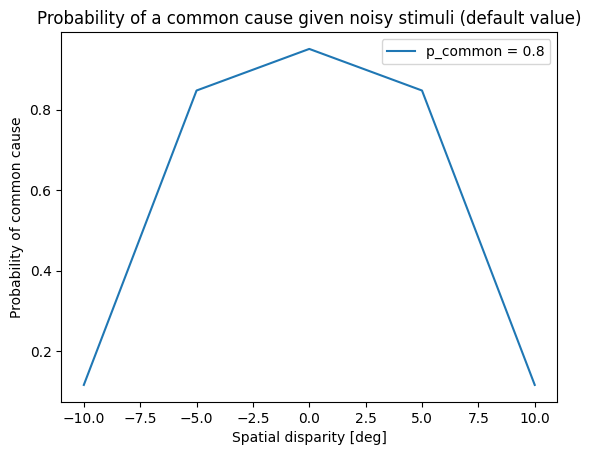

In [31]:
x_v_values = np.arange(-10, 10 + 1e-5, 5)  #locations extended from 10° to the left of the fixation point to 
#10° to the right of the fixation point at 5° intervals
x_a_values = np.zeros(5)
x_diff = x_v_values - x_a_values

P_C1_changeP = [P_C1_given_perception(x_v_values, x_a_values)]

for p in P_C1_changeP:
    plt.plot(x_diff, p, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that with default values the probability of common cause assumed by participant is less likely then not assuming it (less 50%) for more than +/-7.5°.

### probability of a common cause given noisy stimuli vary P_common
That means we change the prior beliefe, i.e. the prior uncertainty (increase with higher sigma).


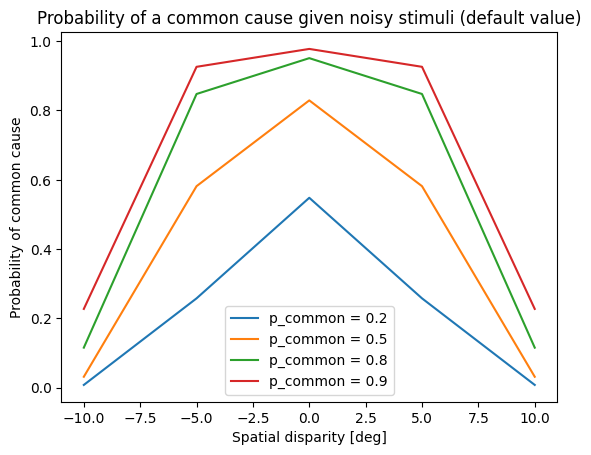

In [32]:
P_common_difference = [0.2, 0.5, 0.8, 0.9]
P_common_dict = {}
for p_common in P_common_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, p_common=p_common)
    P_common_dict[p_common] = P_C1_values

for p_common, p_values in P_common_dict.items():
    plt.plot(x_diff, p_values, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_v
That means we make visual data different noisy (higher sigma = more noisy)


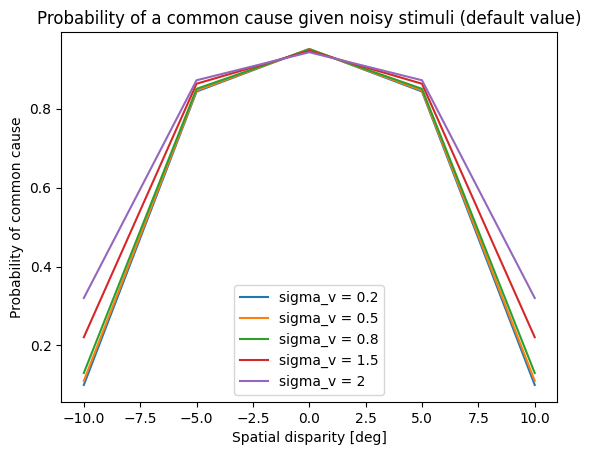

In [33]:
sigma_v_difference = [0.2, 0.5, 0.8, 1.5, 2]
sigma_v_dict = {}
for sigma_v in sigma_v_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_v=sigma_v)
    sigma_v_dict[sigma_v] = P_C1_values

for sigma_v, p_values in sigma_v_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_v = {sigma_v}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_a
That means we make the Auditory signal change in noise (higher sigma = more noisy).


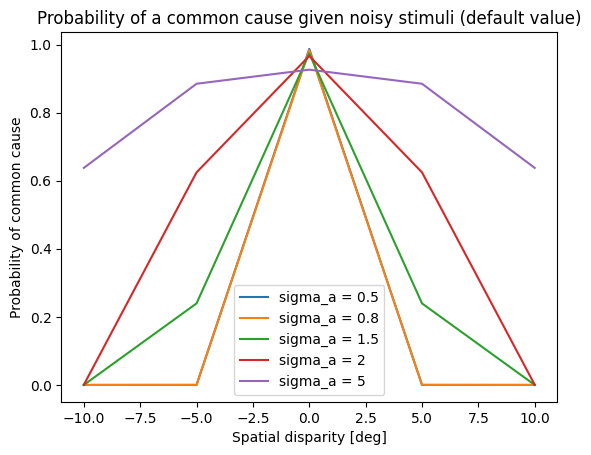

In [34]:
sigma_a_difference = [0.5, 0.8, 1.5, 2, 2, 5, 5]
sigma_a_dict = {}
for sigma_a in sigma_a_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_a=sigma_a)
    sigma_a_dict[sigma_a] = P_C1_values

for sigma_a, p_values in sigma_a_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_a = {sigma_a}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

Need more noise in audio to see a difference. 
But again higher noise increase probability of thinking its a common cause.

### probability of a common cause given noisy stimuli vary sigma_p

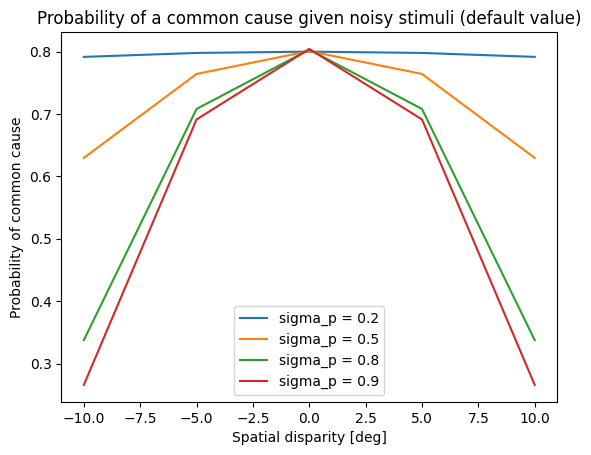

In [35]:
sigma_p_difference = [0.2, 0.5, 0.8, 0.9]
sigma_p_dict = {}
for sigma_p in sigma_p_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_p=sigma_p)
    sigma_p_dict[sigma_p] = P_C1_values

for sigma_p, p_values in sigma_p_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_p = {sigma_p}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that the probability of common cause is higher with higher sigma_p, i.e. more noise in the prior belief.

### Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)


In [62]:
# Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)

# Default parameters
p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()


def estimate_sv_sa(xv, xa, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0):
    p_c1 = P_C1_given_perception(xv, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)  #eq.2

    # Estimate sv and sa using the equations provided eq.11
    sv_c2 = (xv / sigma_v ** 2 + mu_p / sigma_p ** 2) / (1 / sigma_v ** 2 + 1 / sigma_p ** 2)
    sa_c2 = (xa / sigma_a ** 2 + mu_p / sigma_p ** 2) / (1 / sigma_a ** 2 + 1 / sigma_p ** 2)

    # Common cause estimate eq.12
    s_common = (xv / sigma_v ** 2 + xa / sigma_a ** 2 + mu_p / sigma_p ** 2) / \
               (1 / sigma_v ** 2 + 1 / sigma_a ** 2 + 1 / sigma_p ** 2)

    sv_hat = p_c1 * s_common + (1 - p_c1) * sv_c2  #eq.9
    sa_hat = p_c1 * s_common + (1 - p_c1) * sa_c2  #eq.10
    return sv_hat, sa_hat


def plot_estimated_positions(xv_vals, xa=0.0, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0, ax=None):
    sv_hats, sa_hats = estimate_sv_sa(xv_vals, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)

    if ax is None:
        ax = plt.gca()
    
    ax.plot(xv_vals,  np.array(sv_hats).flatten(), label="Estimated $\hat{s}_v$")
    ax.plot(xv_vals,  np.array(sa_hats).flatten(), label="Estimated $\hat{s}_a$")
    ax.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    ax.set_xlabel("$x_v$ (Visual observation)")
    ax.set_ylabel("Estimated position")
    ax.set_title(
        fr"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$"
        f"\n (with $x_a = 0$, $p_{{common}} = {p_common}$, "
        f"$\sigma_v = {sigma_v}$, $\sigma_a = {sigma_a}$, $\sigma_p = {sigma_p}$)"
    )
    ax.legend()
    ax.grid(True)


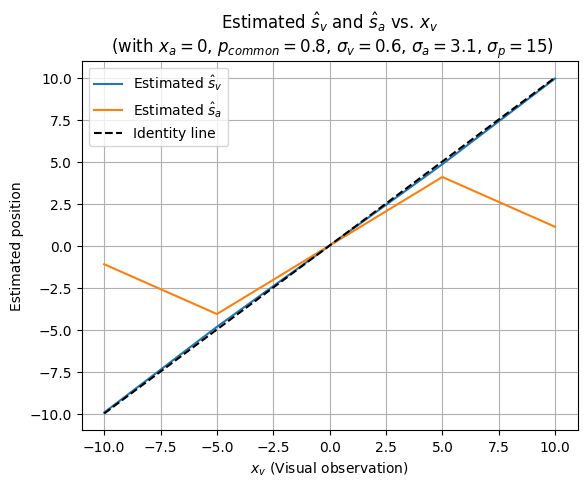

In [63]:
#xv_vals = np.linspace(-10, 10, 200)

plot_estimated_positions(x_v_values, x_a_values, p_common=p_common, sigma_v=sigma_v, sigma_a=sigma_a, sigma_p=sigma_p,
                         mu_p=mu_p)
plt.show()

$x_v$ is the observed (noisy) visual cue. 
$\hat{{s}}_v$ is estimated true visual stimulus position (blue)
$\hat{{s}}_a$ is estimated true auditory stimulus position (orange)

From the plot we observed when $x_v$ is close to zero, under the assumption $x_a$ is 0, the two stimulus integrate to a common cause, i.e. the estimated positions are close to each other. 
When $x_v$ is far away from zero the estimated positions diverge, i.e. the visual and auditory stimulus are not integrated. 
At large disparities, the estimates diverge — reflecting segregation due to low posterior for a common cause (The posterior p(C=1∣$x_v$,$x_a$) drops, and p(C=2∣$x_v$​,$x_a$​) increases.).

The identity line in the plot, shows the estimated position if the system relied purely on the visual input. 
So $\hat{{s}}$ = $x_v$. If the estimated visual position s^vs^v​ follows the identity line, it means the estimate is fully determined by the visual cue — i.e., no integration is happening.

### Varying $p_{{common}}$, $\sigma_v$, $\sigma_a$, $\sigma_p$ (with few points like experiment)

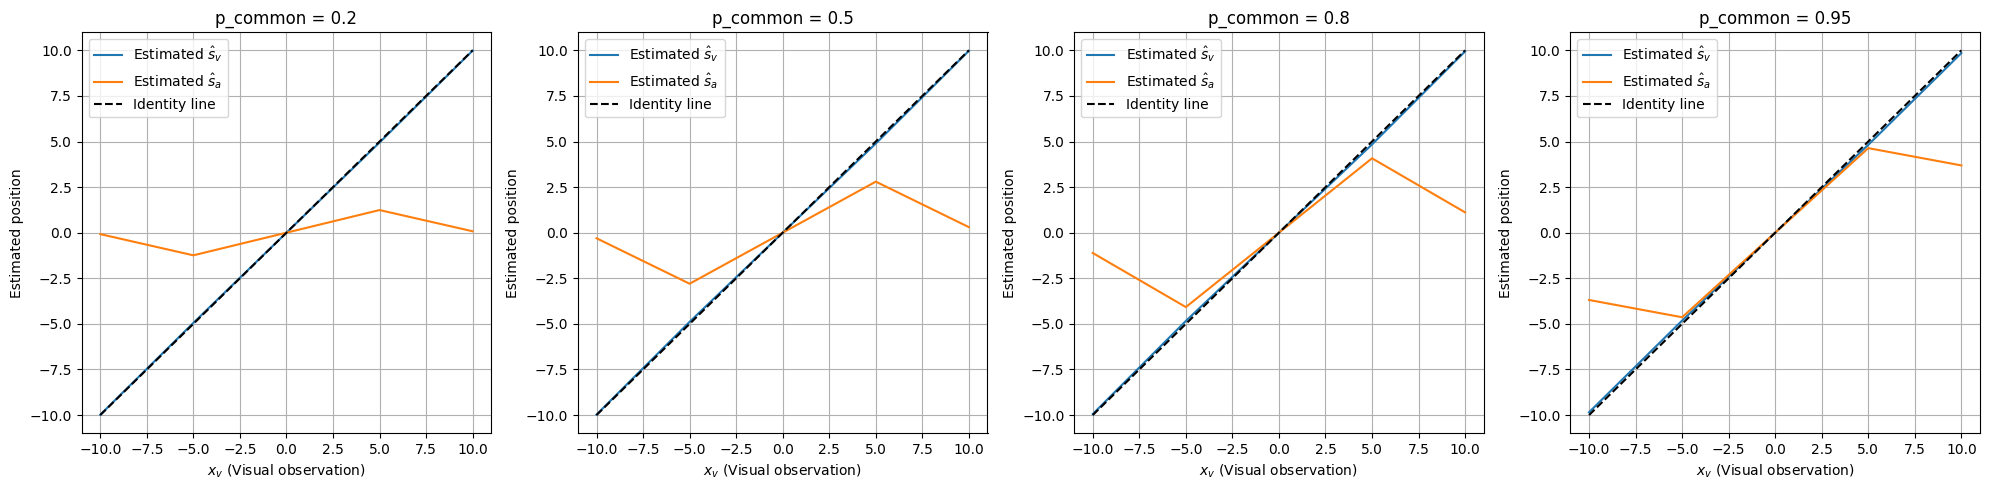

In [ ]:
#varying p_common
p_common_values = [0.2, 0.5, 0.8, 0.95]

fig, axes = plt.subplots(1, len(p_common_values), figsize=(20, 5))  # 1 row, 4 columns

for ax, p_common in zip(axes, p_common_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        p_common=p_common,
        ax=ax  
    )
    ax.set_title(f'p_common = {p_common}')

plt.tight_layout()
plt.show()

Varying $p_{{common}}$ means changing the belief in common cause. if we increase this beliefe, the estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ get closer to getter, indicating that even with higher spatial disparity ($x_v$ more far away from zero  and so from $x_a$) the beliefe in common cause is high and lead to close estimation of the two stimuli. 

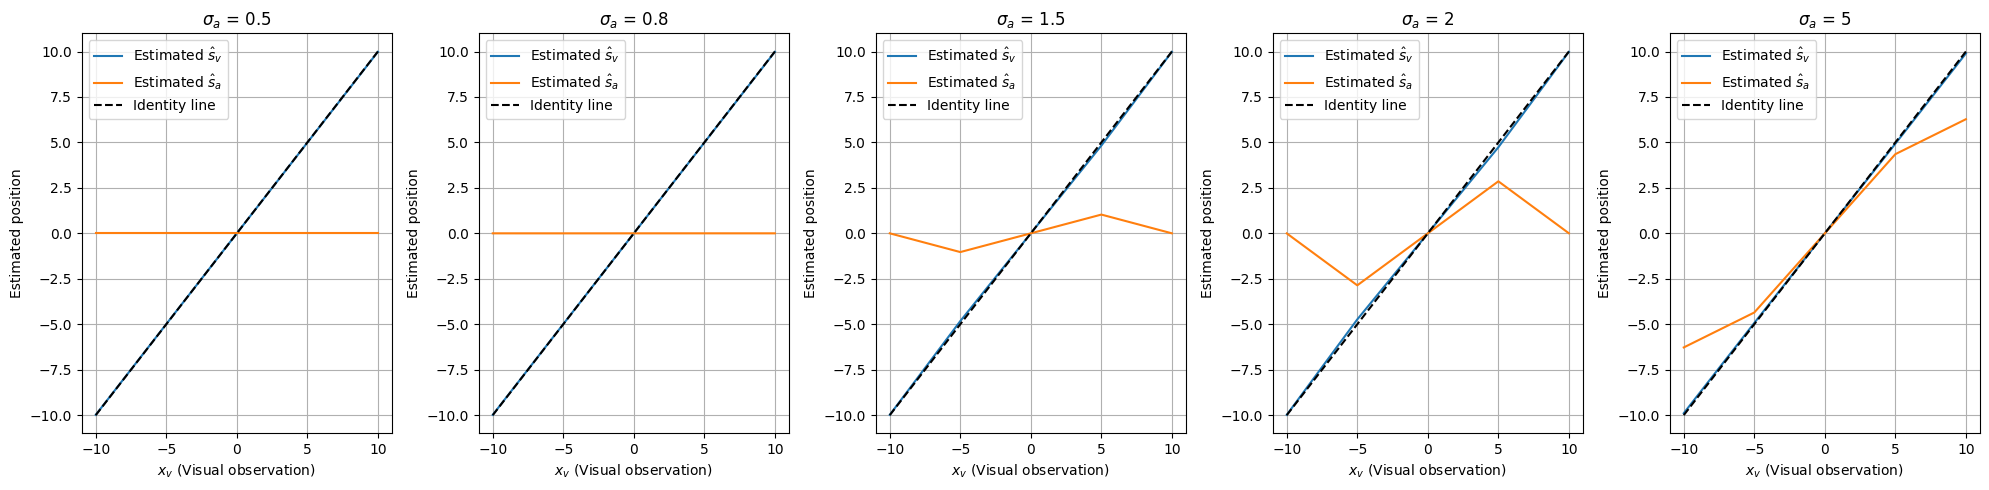

In [66]:
# Varying sigma_a
sigma_a_values = [0.5, 0.8, 1.5, 2, 5]

fig, axes = plt.subplots(1, len(sigma_a_values), figsize=(20, 5))  

for ax, sigma_a in zip(axes, sigma_a_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_a=sigma_a,
        ax=ax  
    )
    ax.set_title(f'$\sigma_a$ = {sigma_a}')

plt.tight_layout()
plt.show()

Varying $\sigma_a$ changes the nosie of auditory data. 
Higher noise, pushes away the estimated $\hat{{s}}_a$ from the horizontal line zero (caused by $x_a$ = 0). 
The noiser the auditory signal get, the higher the probability of belief in common cause (with $\sigma_a$ = 5 high overlap from $\hat{{s}}_a$ and $\hat{{s}}_v$). 

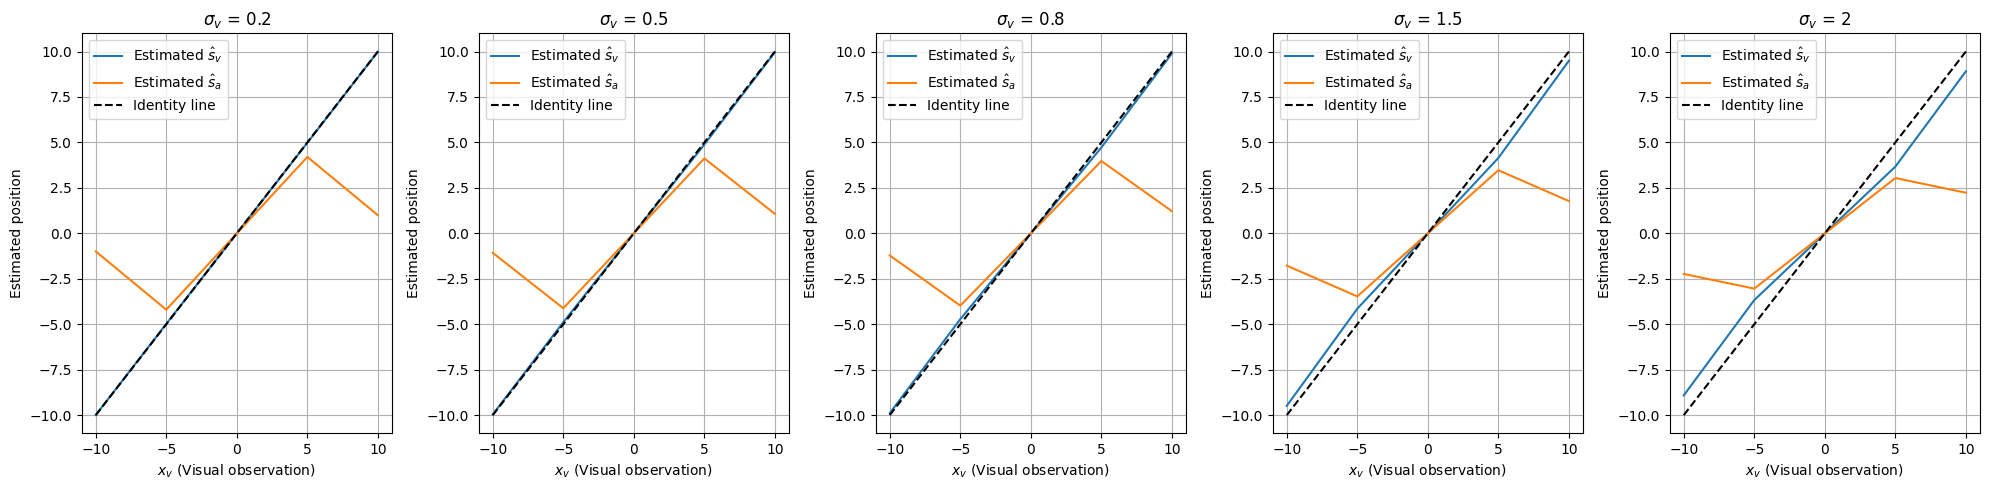

In [67]:
# Varying sigma_v
sigma_v_values = [0.2, 0.5, 0.8, 1.5, 2]

fig, axes = plt.subplots(1, len(sigma_v_values), figsize=(20, 5))  

for ax, sigma_v in zip(axes, sigma_v_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_v=sigma_v,
        ax=ax  
    )
    ax.set_title(f'$\sigma_v$ = {sigma_v}')

plt.tight_layout()
plt.show()

Varying $\sigma_v$ changes the nosie of visual data. 
Higher noise, pushes away the estimated $\hat{{s}}_v$ from the identity line(caused by varying $x_v$ on x-axis). 
The noiser the visual signal get, the higher the probability of belief in common cause (with $\sigma_v$ = 2 high overlap from $\hat{{s}}_a$ and $\hat{{s}}_v$) and the more away the estimated visual signal get from identity line. 

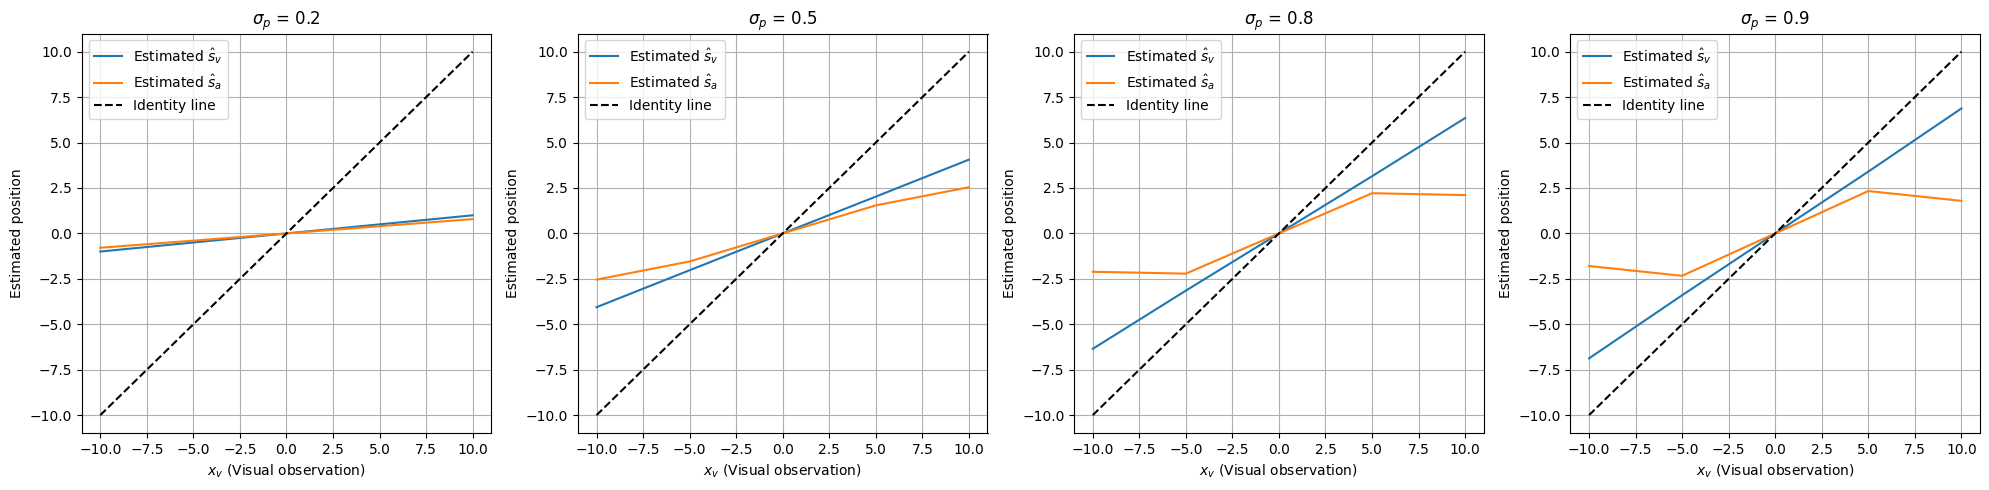

In [68]:
# Varying sigma_p
sigma_p_values = [0.2, 0.5, 0.8, 0.9]
fig, axes = plt.subplots(1, len(sigma_p_values), figsize=(20, 5))  

for ax, sigma_p in zip(axes, sigma_p_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_p=sigma_p,
        ax=ax  
    )
    ax.set_title(f'$\sigma_p$ = {sigma_p}')

plt.tight_layout()
plt.show()

Varying $\sigma_p$ changes the prior uncertainty. 
Increasing $\sigma_p$ brings the estimated values closer to the values we observe before and more far away from each other. 
While with a low prior uncertainty, $\hat{{s}}_a$ and $\hat{{s}}_v$ are close to each other (so high probabilty of common cause) and far away from identity line.

### Varying $p_{{common}}$, $\sigma_v$, $\sigma_a$, $\sigma_p$ (more points)

In [39]:
def plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=None, **kwargs):
    """
    Plot estimated stimulus positions ŝv and ŝa for varying parameter values in a single diagram.
    
    Args:
        xv_vals: Array of visual observation values.
        xa: Fixed auditory observation value.
        param_name: Name of the parameter to vary (e.g., "p_common").
        param_values: List of values for the parameter to vary.
        kwargs: Other fixed parameters.
    """
    
    if param_values is None:
        default_params = {
            "p_common": 0.8,
            "sigma_v": 0.6,
            "sigma_a": 3.1,
            "sigma_p": 15.0,
            "mu_p": 0.0
        }
        param_values = [kwargs.get(param_name, default_params.get(param_name, 0.0))]

    plt.figure(figsize=(10, 6))

    for param_value in param_values:
        kwargs[param_name] = param_value
        sv_hats, sa_hats = [], []
        for xv in xv_vals:
            sv_hat, sa_hat = estimate_sv_sa(xv, xa, **kwargs)
            sv_hats.append(sv_hat)
            sa_hats.append(sa_hat)

        plt.plot(xv_vals, sv_hats, label=f"$\hat{{s}}_v$ ({param_name}={param_value})")
        plt.plot(xv_vals, sa_hats, label=f"$\hat{{s}}_a$ ({param_name}={param_value})")

    plt.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    plt.xlabel("xv (Visual observation)")
    plt.ylabel("Estimated position")
    plt.title(f"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$ (varying {param_name})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

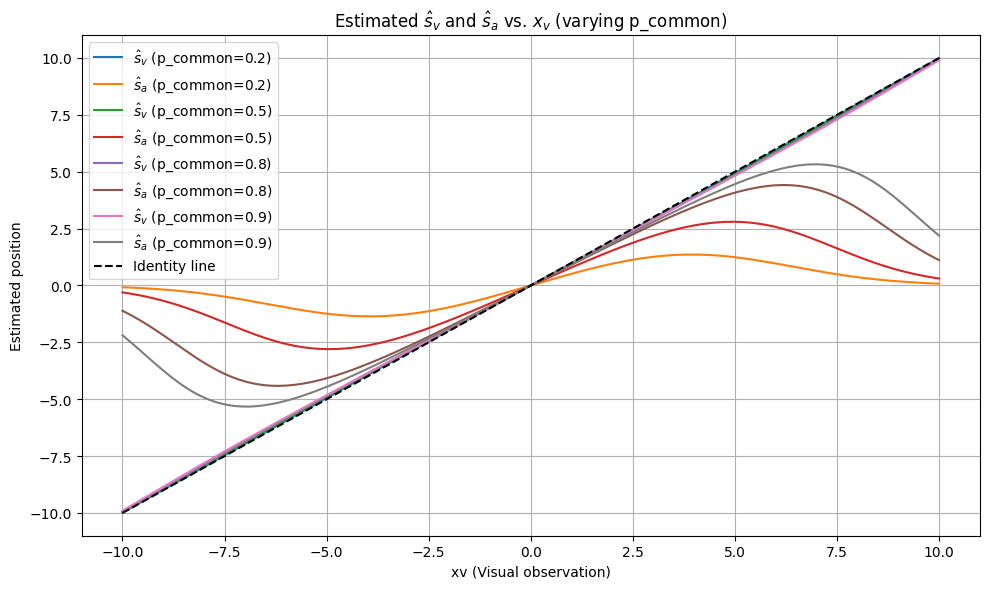

In [40]:
xv_vals = np.linspace(-10, 10, 200)
p_common_values = [0.2, 0.5, 0.8, 0.9]

plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=p_common_values, sigma_v=0.6,
                                  sigma_a=3.1, sigma_p=15.0, mu_p=0.0)

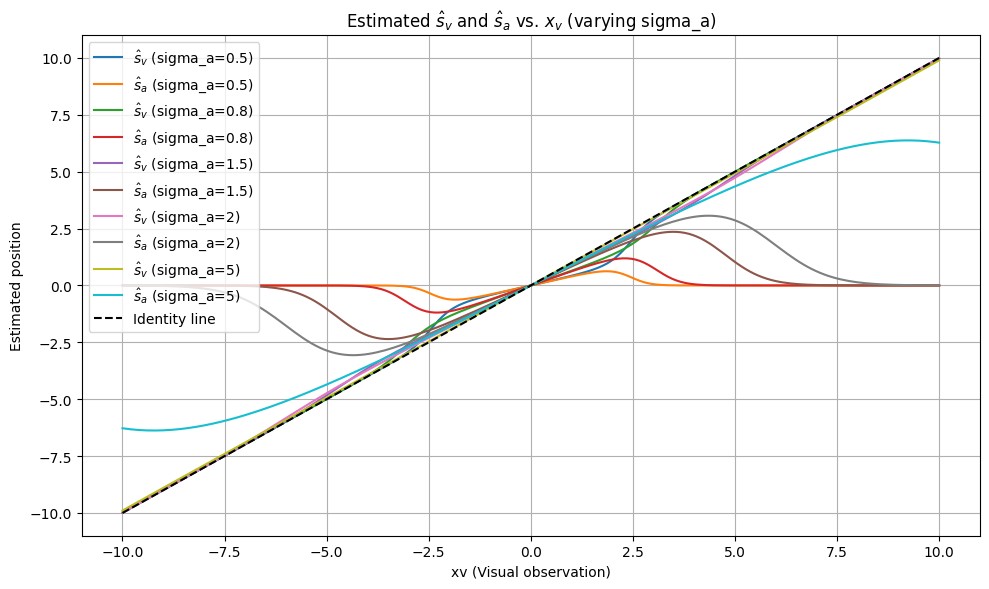

In [41]:
xv_vals = np.linspace(-10, 10, 200)

# Varying sigma_a
sigma_a_values = [0.5, 0.8, 1.5, 2, 5]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_a", param_values=sigma_a_values, sigma_v=0.6,
                                  sigma_p=15.0, mu_p=0.0)


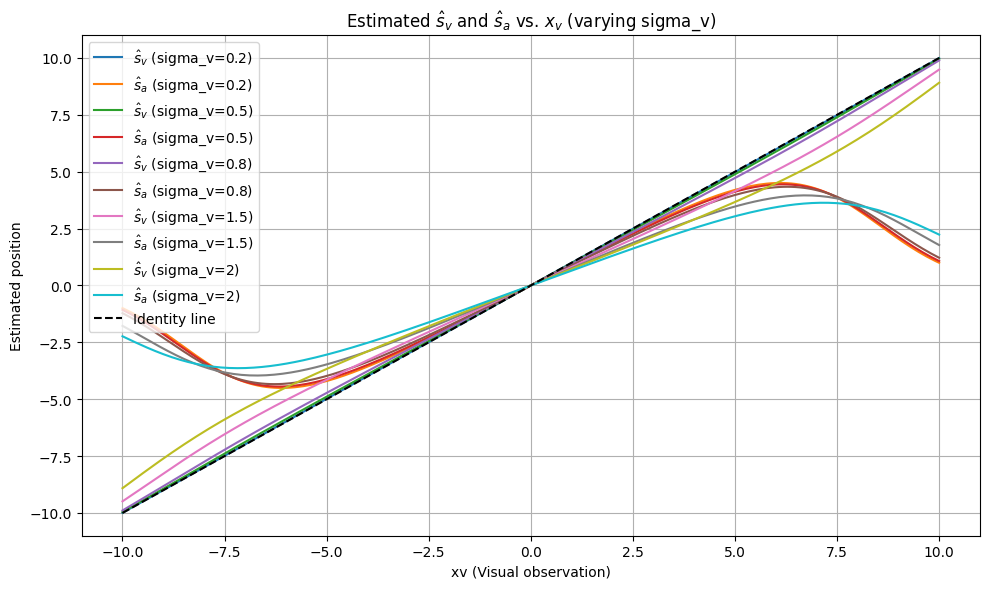

In [42]:
# Varying sigma_v
sigma_v_values = [0.2, 0.5, 0.8, 1.5, 2]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_v", param_values=sigma_v_values, sigma_a=3.1,
                                  sigma_p=15.0, mu_p=0.0)


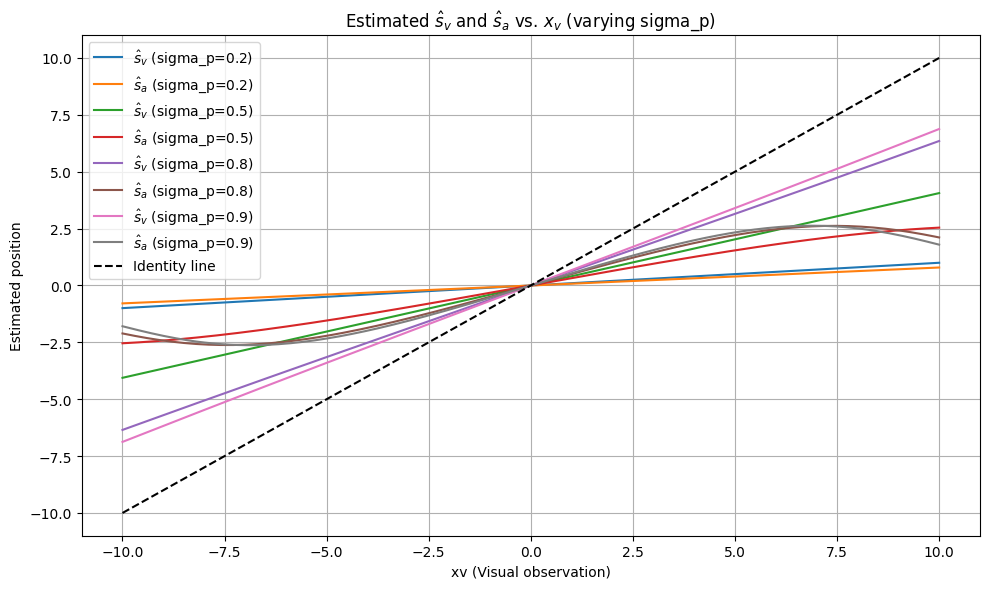

In [43]:
# Varying sigma_p
sigma_p_values = [0.2, 0.5, 0.8, 0.9]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_p", param_values=sigma_p_values, sigma_v=0.6,
                                  sigma_a=3.1, mu_p=0.0)

### Part(e)  — Evaluate the integral in Equation 13 Monte Carlo Sampling analytically

Consider the integral in Equation 13, how might you evaluate it?


##### What kind of function is  $p(\hat{{s}}_v|x_v,x_a)$? How does it affect the analytical evaluation?
It represents the conditional distribution of the estimated visual position  $\hat{{s}}_v$​ given noisy sensory observations $x_v$ (visual) and $x_a$​ (auditory).
Due to noise and nonlinearities, analytic evaluation is hard. So we use a Monte-Carlo numerical approximation.

In [44]:
def mont_carlo_estimation(target_sv_hat, sv, sa, sigma_v, sigma_a, delta=0.1, n_samples=5000):
    xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
    xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
    sv_estimates = np.array([estimate_sv_sa(xv, xa)[0] for xv, xa in zip(xv_samples, xa_samples)])
    prob_density = np.mean(np.abs(sv_estimates - target_sv_hat) < delta)
    return prob_density

In [74]:
def plot_monte_carlo_distribution(sv_true_values, sa_true_values, sigma_v=0.6, sigma_a=3.1, delta=0.1, n_samples=2000):
    """
    Plot the distribution of estimated visual locations given arrays of true stimulus locations.

    Args:
        sv_true_values: Array of true visual stimulus locations.
        sa_true_values: Array of true auditory stimulus locations.
        sigma_v: Standard deviation of visual noise.
        sigma_a: Standard deviation of auditory noise.
        delta: Threshold for probability density estimation.
        n_samples: Number of Monte Carlo samples.
    """
    if len(sv_true_values) != len(sa_true_values):
        raise ValueError("sv_true_values and sa_true_values must have the same length.")

    plt.figure(figsize=(10, 6))

    for sv_true, sa_true in zip(sv_true_values, sa_true_values):
        sv_hat_range = np.linspace(-5, 5, 100)
        distribution = [mont_carlo_estimation(sv_hat, sv_true, sa_true, sigma_v, sigma_a, delta, n_samples)
                        for sv_hat in sv_hat_range]

        plt.plot(sv_hat_range, distribution, label=f'$s_v$={sv_true}, $s_a$={sa_true}')

    plt.xlabel('Estimated visual location ($\hat{s}_v$)')
    plt.ylabel('Probability density of the estimate $p(\hat{s}_v)$')
    plt.title('Numerical evaluation of Monte Carlo distribution')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

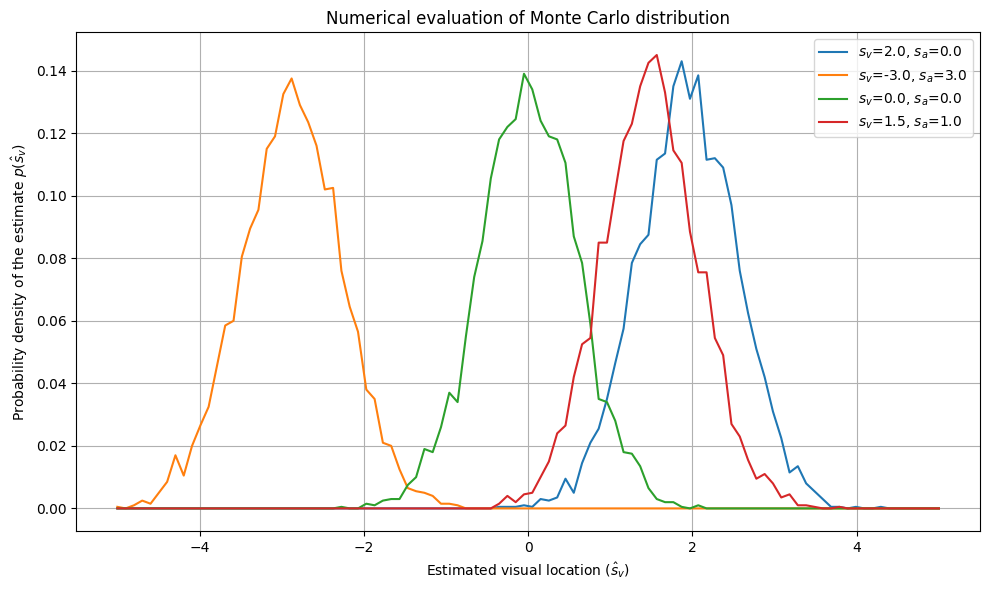

In [ ]:
sv_true_values = [-3.0,2.0,0.0, 1.5]
sa_true_values = [0.0, 3.0, 0.0, 1.0]

plot_monte_carlo_distribution(sv_true_values, sa_true_values, sigma_v=0.6, sigma_a=3.1, delta=0.1, n_samples=2000)

As the disparity increases, the peak shifts and the distribution spreads out, indicating less certainty and weaker integration.

This reflects how the brain infers whether cues come from a common cause or not, core to the causal inference framework.

### Part (f) — Evaluate the integral in Equation 13 using Monte Carlo sampling
The nature of p(ˆ sv|xv, xa) also suggests a numerical method for obtaining estimates
of p(ˆ sa|sv, sa) and p(ˆ sv|sv, sa). Use that method to plot both as a function of sv
assuming sa = 0 (use a heat-map for these plots).

In [71]:
def generate_sv_sa_heatmaps(sv_range=(-5, 5), sa=0.0, bins=50, delta=0.2, n_samples=1000):
    sv_vals = np.linspace(*sv_range, bins)
    shat_vals = np.linspace(*sv_range, bins)
    
    heatmap_sv = np.zeros((bins, bins))
    heatmap_sa = np.zeros((bins, bins))
    
    for i, sv in enumerate(sv_vals):
        xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
        xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
        estimates = [estimate_sv_sa(xv, xa) for xv, xa in zip(xv_samples, xa_samples)]
        shats_sv = np.array([e[0] for e in estimates])
        shats_sa = np.array([e[1] for e in estimates])
        for j, target_shat in enumerate(shat_vals):
            heatmap_sv[i, j] = np.mean(np.abs(shats_sv - target_shat) < delta)
            heatmap_sa[i, j] = np.mean(np.abs(shats_sa - target_shat) < delta)
    
    return sv_vals, shat_vals, heatmap_sv, heatmap_sa


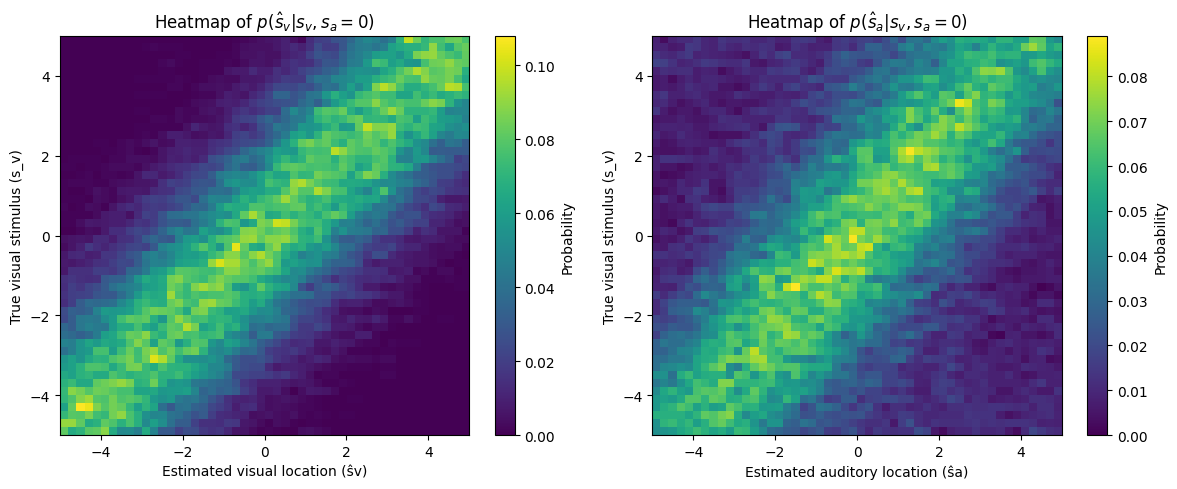

In [72]:
sv_vals, shat_vals, heatmap_sv, heatmap_sa = generate_sv_sa_heatmaps()

# Plot the heatmap for p(ŝv | s_v, s_a)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(heatmap_sv, extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto', origin='lower')
plt.colorbar(label='Probability')
plt.xlabel('Estimated visual location (ŝv)')
plt.ylabel('True visual stimulus (s_v)')
plt.title('Heatmap of $p(\\hat{s}_v | s_v, s_a=0)$')

# Plot the heatmap for p(ŝa | s_v, s_a)
plt.subplot(1, 2, 2)
plt.imshow(heatmap_sa, extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto', origin='lower')
plt.colorbar(label='Probability')
plt.xlabel('Estimated auditory location (ŝa)')
plt.ylabel('True visual stimulus (s_v)')
plt.title('Heatmap of $p(\\hat{s}_a | s_v, s_a=0)$')

plt.tight_layout()
plt.show()
